# PROJECT 3 – UNSUPERVISED TECHNIQUES


## PROJECT MAIN GOALS

The main goals of this project will be to understand the practical application of PCA and two 
different clustering models. In addition, some conclusions will be requested to compare the 
different methods, emphasizing pros and cons of each one of them.
The dataset is not going to be provided, so the student can select how difficulty of the 
development part. According to the dataset characteristics and the justification of the choice, 
the project results would be more realistic and value-rich, and this fact is going to be into 
consideration for the project score. 

## PROJECT DELIVERY

The final delivery will be a zip file, which must contain:
- Ipynb document: jupyter script where the code is developed.
- Html document: same jupyter script downloaded as .html document. The kernel 
must be executed before downloading it. 
- Dataset: Provide the dataset document.

## PROJECT DEVELOPMENT

### 1 Choosing a dataset

### Breast Cancer Precitions (SVM & KNN)

Attribute Information

- 1) ID number
- 2) Diagnosis (M = malignant, B = benign)
- 3-32)

- Ten real-valued features are computed for each cell nucleus:

- a) radius (mean of distances from center to points on the perimeter)
- b) texture (standard deviation of gray-scale values)
- c) perimeter
- d) area
- e) smoothness (local variation in radius lengths)
- f) compactness (perimeter^2 / area - 1.0)
- g) concavity (severity of concave portions of the contour)
- h) concave points (number of concave portions of the contour)
- i) symmetry
- j) fractal dimension ("coastline approximation" - 1)



### Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action='ignore')

### Load data 

In [2]:
import os

In [3]:
df = pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

#### 1.2. Why is it an appropriate dataset? Does it require any modification or adaptation to be used?
We believe that the dataset explains an interesting topic such as breast cancer and I believe that it is accurate since the variables found in the dataset are highly indicative. Looking at the dataset, we can see that the last variable that has the name of unnamed 32 we believe that it is not necessary and we will also have to see which are more correlated to be the target of whether or not to have breast cancer.

#### 1.3. Justify why that dataset is selected. What are your interests related to this data?
Looking at the datasets, we concluded that this was very complete and reliable in terms of variables and number of columns, we thought it would be interesting to do a study on this type of cancer.

#### 1.4. Provide your own objectives for the project.
We want to be able to use unsupervised machine learning models confidently in order to cluser our dataset and use this to identify patterns within the dataset. 

#### 1.5. Provide some questions (minimum 5) that you want to answer as soon as you have finished the study. 
- Which features seem to have the most noticeable differences between malignant and benign tumors?
- Can the KNN model accurately predict whether a tumor is malignant or benign based on the given features?
- How does the performance of the SVM model compare to the KNN model in distinguishing between malignant and benign tumors?
- Are there any features that do not seem to have much impact on the classification of tumor types?
- How do the predictions of the KNN and SVM models align with the actual diagnoses provided in the dataset?

### Load, clean and validate the dataset.

#### 2.1. Understand the dataset technically.
All of the variables in our dataset are numerical variables, except for 'diagnosis' which is our target variable. However, diagnosis will not be used for the purpose of this project as what we are going to be using is unsupervised models only, and therefore we don't need a target variable. 

Furthermore, we understand that we will be needing to scale our variables in order for our odel to perform better, for which we will use StandardScaler. All of the variables are measures of tumours, such as radius, perimeter, area, etc.

#### 2.2. Obtain the number and names of attributes available.

In [5]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
#duplicates?
df.duplicated().sum()

0

#### 2.4. Erase all rows that contains any empty values.

In [9]:
# missing values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
#"Unnamed: 32" column 
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [11]:
df["diagnosis"].value_counts()/len(df)

diagnosis
B    0.627417
M    0.372583
Name: count, dtype: float64

#### Scaling the data

In [14]:
df_to_scale = df.loc[:, df.columns != 'diagnosis']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data (excluding the variable to exclude)
scaler.fit(df_to_scale)

# Transform the scaled data
scaled_data = scaler.transform(df_to_scale)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=df_to_scale.columns)

# Concatenate the scaled DataFrame with the variable to exclude
scaled_df['diagnosis'] = df['diagnosis']

#Checking if it was done correctly
scaled_df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,...,0.117700,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,1
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,...,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978,1
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,1
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,1


# 3. Separate training and test datasets

In [15]:
#Defining features and target variables
features =df.drop(["diagnosis"],axis=1)
target = df["diagnosis"].values.reshape(-1,1)

In [16]:
#split X and y in training and test set in 80:20 ratio
x_train , x_test , y_train , y_test = train_test_split(features , target , test_size = 0.2 , random_state = 0)

I used 20% since it is a common split and often provides a good balance between having enough data for training and enough data for testing.

# 4. K-means method

### 4.1. What is Sum Squared Error (SEE)? Could you provide and explain the formula?

The Sum of Squared Errors (SSE), is a measure commonly used in machine learning to evaluate the goodness of fit of a model to the data. It looks at the discrepancy between the observed values of the target variable and the values predicted by the model.

The formula for calculating SSE depends on the context in which it is used. In the context of linear regression, for example, SSE is calculated as the sum of the squared differences between the actual target values (y) and the predicted values (^Y)

However in K_means, the SSE is the sum of the squared distances between each data point and its assigned cluster centroid.
 
The main idea behind SSE is that we want to minimize it when fitting a model to the data. A smaller SSE indicates a better fit of the model to the data, meaning that the model's predictions are closer to the actual observed values.

### 4.2. Obtain k value.
### 4.2.1. How are we getting k value (graphically, calculating)? Why?
### 4.2.2. Represent the elbow graph. Which K value is selected?

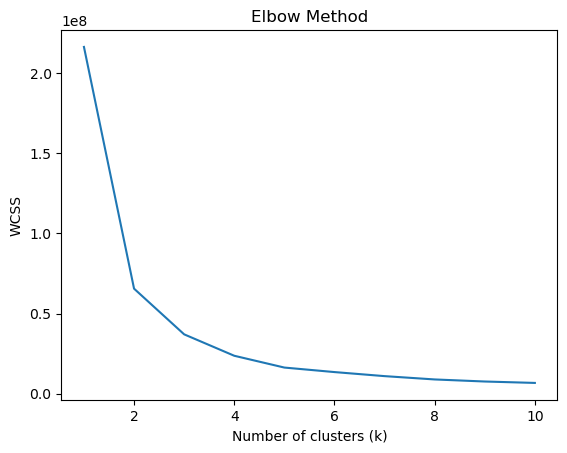

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(x_train)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

It could be said that the K point in this case is 2, we are getting this value by looking at the graph and seeing at which position the line starts to stabilize that being the elbow point. However, we think that this is not 100% clear by looking at the graph so we will try the silhouette score method to make sure which is the most optimal value for K.

### 4.2.3. (Optional) How could be improve the k value election, if we are using graphical technique to decide it?

Using a function to find the number of clusters that gives us best possible silhouette score.

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np


silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(x_train)
    silhouette_avg = silhouette_score(x_train, cluster_labels)
    silhouette_scores.append(silhouette_avg)


optimal_k = np.argmax(silhouette_scores) + 2  

print("Optimal number of clusters (k):", optimal_k)

Optimal number of clusters (k): 2


We want to try the model with different k values to see what silhouette score we can get when using other k values and how much it varies. However, we think that using 2 clusters is going to make the most sense in the end because in our original dataset, we only had 2 possible values for the diagnosis: Malignant or Benign.

### k=2 value

In [19]:
kmeans_2 = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans_2.fit(x_train)

test_cluster_labels = kmeans_2.predict(x_test)

In [20]:
silhouette_avg_2 = silhouette_score(x_train, kmeans_2.labels_)

print("Silhouette Score:", silhouette_avg_2)

Silhouette Score: 0.7080032833682895


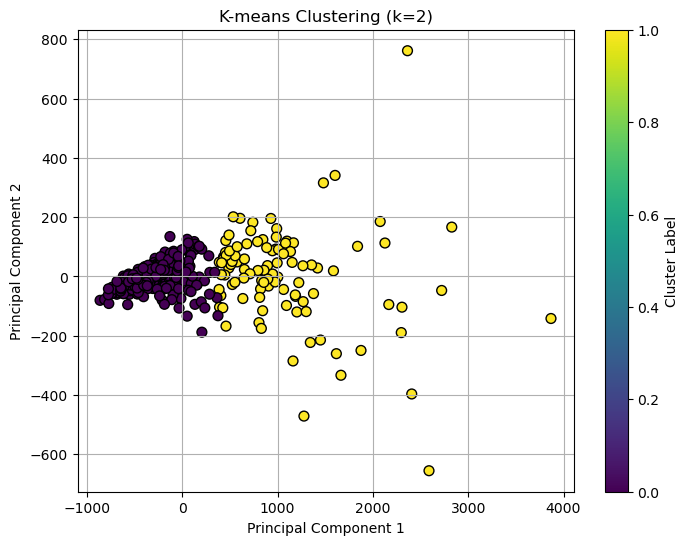

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=kmeans_2.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('K-means Clustering (k=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

It can be seen that k=2 has a better value and also it is what makes the most sense as, by knowing the context of our dataset, we only have 2 possible outcomes for the tumor: malignant and benign.

# 5. Unsupervised model - Choose another method

###  5.1. Why do you choose this method? Which is the main different with k-means

#### K-medoids

K-medoids is a variation of K-means that uses medoids instead of centroids. A medoid is the most centrally located point in a cluster, minimizing the dissimilarity between the medoid and other points in the cluster. Unlike centroids, which are typically not actual data points, medoids are real data points from the dataset.

K-medoids tends to be more robust to outliers than K-means because medoids are less sensitive to outliers than centroids, which can be heavily influenced by extreme values. K-means tends to produce clusters with a spherical shape due to its reliance on Euclidean distance. K-medoids can handle clusters of arbitrary shape since it uses the actual data points to define cluster centers.

In summary, if you have data with outliers, non-spherical clusters, or you prioritize cluster interpretability, K-medoids might be a better choice than K-means. However, if your data is well-behaved and you prioritize computational efficiency, K-means could be more suitable.


In [22]:
## If skicit-learn-extra is not installed, run this code to install it and be able to do K-medoids

#!pip install scikit-learn-extra.

### 5.2 Get k-value and train the model. Which error measure are you selecting? Why


In [23]:
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids

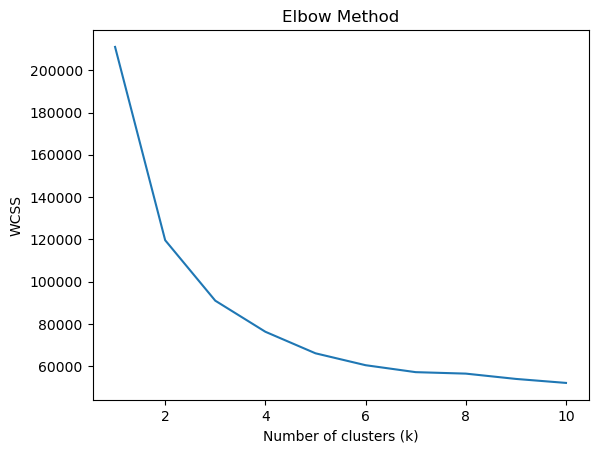

In [24]:
wcss = []
for k in range(1, 11):
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(x_train)
    wcss.append(kmedoids.inertia_)

# Plot the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


We believe that the most optimal number of clusters to use is 2 because we know that in our dataset we only have 2 possible values for diagnosis: Malignant and benign. However, only by looking at the elbow method graph it is yet a bit unclear which number of custers we should use for out kmedoids model. Therefore now we will look at the silhouette scores with the following function.

In [25]:
silhouette_scores = []
for k in range(2, 11):  # Start from k=2 because silhouette score requires at least 2 clusters
    kmedoids = KMedoids(n_clusters=k, random_state=42)
    kmedoids.fit(x_train)  # Replace X with your data
    labels = kmedoids.labels_
    silhouette_scores.append(silhouette_score(x_train, labels))

# Find the optimal k-value with the highest silhouette score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 to get the actual k-value

print("Optimal number of clusters:", optimal_k)


Optimal number of clusters: 2


In [26]:
# Step 2: Get k-value and train the model
kmedoids = KMedoids(n_clusters=2)
kmedoids.fit(x_train)

KMedoids(n_clusters=2)

In [27]:
# Step 3: Predict clusters on test data
labels = kmedoids.predict(x_test)

### 5.3. Validate the accuracy of the model.


In [28]:
# Step 4: Validate the accuracy of the model
silhouette_avg = silhouette_score(x_test, labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6405153625935783


In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_train)

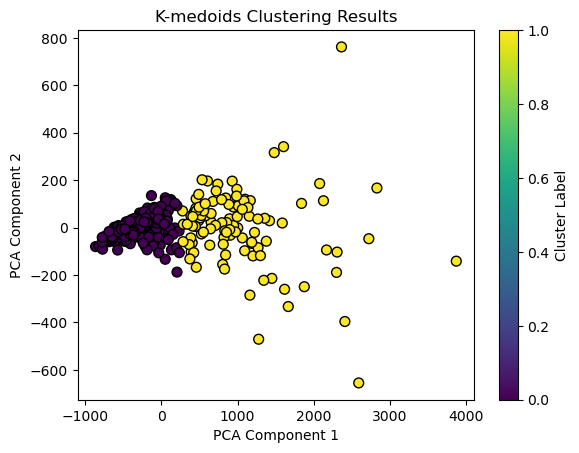

In [30]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-medoids Clustering Results')
plt.colorbar(label='Cluster Label')
plt.show()

### 5.4. Is it better than k-means?

No, the K-means model offers a higher silhouette score which is a sign of a higher reliability and accuracy of the model. In this case the K-means offer a high silhouette score already so it's normal that another model does not offer a hgher score. However I find that K-medoids could be useful in other datasets or possible models.😉

# 6. Dimensionality reduction - PCA

### 6.1. What is PCA?

Principal Component Analysis, or PCA, is a statistical method for reducing dimensionality while retaining the greatest amount of variance. It is frequently applied to data analysis and to increase the effectiveness of predictive models. 

PCA does not require any labeled data and it analyzes the variance-covariance structure of the data and identifies the directions (principal components) along which the data varies the most. These principal components are orthogonal to each other and are ordered by the amount of variance they explain in the data.

PCA is often used as a preprocessing step in machine learning pipelines to reduce the dimensionality of the feature space while retaining as much information as possible.
It helps in visualizing high-dimensional data, removing noise, and improving the performance of machine learning algorithms by reducing the computational complexity and potential overfitting.

### 6.2. Could it be classified as a supervised technique? Why?

PCA is typically classified as an unsupervised technique because it does not require any labeled data during its operation. However, there are some cases in which PCA can be considered as a part of a supervised learning process.

One such scenario is when PCA is used as a feature extraction or dimensionality reduction technique as a preprocessing step before applying a supervised learning algorithm. In this context, while PCA itself is unsupervised, the overall process that includes both PCA and a subsequent supervised learning algorithm can be considered as a form of supervised learning. 

For example, in a classification task, PCA may be used to reduce the dimensionality of the feature space, and then the reduced features are used as input to a classifier (e.g., logistic regression, support vector machine) that is trained using labeled data. In this case, the supervision comes from the labeled data used to train the classifier, while PCA itself operates in an unsupervised manner. 

So, while PCA is fundamentally an unsupervised technique, it can play a role in supervised learning workflows.

### 6.3. Upload “Breast Cancer” dataset from sklearn and apply any modification required to be used.

*Note 1: The Breast Cancer data set is a real-valued multivariate data that consists of two classes, where each class signifies 
whether a patient has breast cancer or not. The two categories are: malignant and benign.*

*Note 2: from sklearn.datasets import load_breast_cancer*

In [31]:
from sklearn.datasets import load_breast_cancer

In [32]:
data = load_breast_cancer()

In [33]:
df_6 = pd.DataFrame(data=data.data, columns=data.feature_names)

#### Dataset needed for exercise 6.3:

In [34]:
df_6

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


#### Dataset that we have been using for the whole project:

In [35]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


As we can see in the comparison above, the dataset that we had picked since the beginning of this project and also for the previous project is the same as the one required for exercise 6.3.

### 6.4. What is the normalization process? Normalize the features from the dataset. 
*Note 3: from sklearn.preprocessing import StandardScaler*

By using the Standard Scaler, we ensure that each of our variables that we are scaling, has a mean of 0 and a standard deviation of 1. This is useful because we remove any bias that might be present in our data and then we have all of the features in the same scale, which can be very important for our machine learning algorithm to perform well.

In [36]:
scaled_df.sample(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
65,0.185378,1.082168,0.223703,0.038142,1.483068,0.825508,0.475842,1.067119,0.516175,0.530523,...,1.255978,0.218592,0.078257,1.421660,0.555572,0.144940,0.712510,0.679863,0.286177,1
191,-0.385490,0.493420,-0.409803,-0.419474,-0.631257,-0.726429,-0.724162,-0.523080,-0.429419,0.010262,...,-0.354547,-0.542734,-0.529278,-1.687182,-1.046355,-1.057031,-1.018297,-1.167642,-0.844305,0
244,1.497524,0.979777,1.529432,1.422367,0.451169,0.975224,1.457641,1.030234,0.607449,-0.396590,...,0.790245,1.121103,0.942974,0.610696,0.270582,0.353153,0.636377,0.031133,-0.432566,1
320,-1.101206,-0.723636,-1.048251,-0.940514,0.693131,0.128093,-0.270425,-0.239088,-0.250523,1.416525,...,-0.825166,-1.064284,-0.861699,0.343297,-0.116191,-0.395261,-0.261383,-0.473615,0.724517,0
557,-1.336086,1.999032,-1.347292,-1.090967,-1.076753,-1.035338,-1.114873,-1.261820,-0.254174,-0.312952,...,1.394395,-1.214107,-0.966822,-1.098904,-1.162132,-1.305831,-1.745063,-0.688779,-0.789998,0


### 6.5. Apply PCA technique (n_components =2) and train it.

In [37]:
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

### 6.6. Plot the visualization of the 2 components with the legend. 

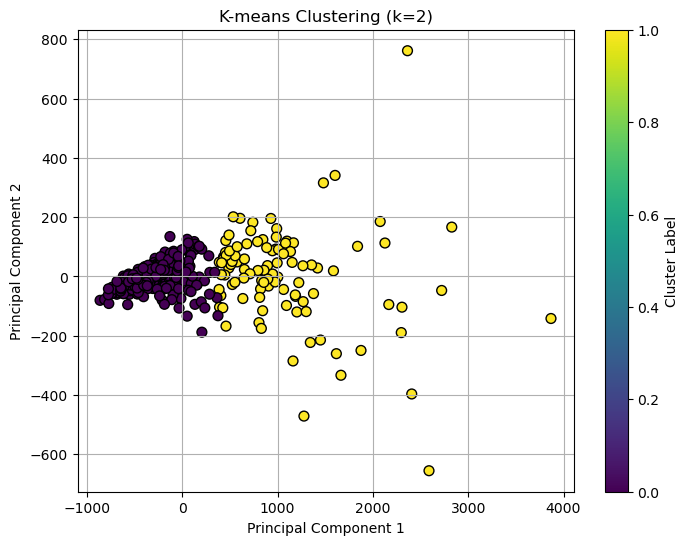

In [38]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=kmeans_2.labels_, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('K-means Clustering (k=2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

### 7. Conclusion (2 points)

### 7.1. Provide a completed conclusion about the clustering methods. It must be clear that you understand both models and their results.

In this project we have proceeded with two different clustering models. Eventhough both models were pretty similar we wanted to test if there could be a possibility of one providing better results than the other. Both similarities and differences were explained previously on the project.


The first model used was the K-means which was provided by the instructions. For this model we analysed which was the optimal number of clusters first looking at the elbow graph where we had a general idea of the optimal number we needed. The best results where given when n_clusters = 2 with the silhouette score being 0.7. Having this silhouette score makes us realise that the model has separated the two groups of values in a very decent way. We believe that this makes total sense taking into account the nature of the diagnosis as it was a binary variable with only 2 possible answers.


For the second take we went with K-medoids. When analysing the optimal number of clusters with this method the results were the same as in the K-means one: 2 clusters was the optimal number. Which again makes sense given the binary nature of the diagnosis. The k-medoids model gave a pretty similar but lower silhouette score being 0.64. As said before the results were pretty decent but the K-means model performed slightly better.